In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
from collections import Counter

In [19]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [21]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [23]:
df.shape

(5575, 5)

In [25]:
##Data cleanind

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5575 entries, 0 to 5574
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5575 non-null   object
 1   v2          5575 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.9+ KB


In [29]:
df.drop(columns=[ "Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5575 entries, 0 to 5574
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5575 non-null   object
 1   v2      5575 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [33]:
df.rename(columns={'v1':'label','v2':'text'},inplace=True)

In [35]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [37]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [39]:
# encoder.classes_ = ['ham', 'spam']
df['label']=encoder.fit_transform(df['label'])

In [41]:
df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [43]:
df.isnull().sum()

label    0
text     0
dtype: int64

In [45]:
df.duplicated().sum()

403

In [47]:
df.drop_duplicates(keep='first',inplace=True)

In [49]:
df.duplicated().sum()

0

In [51]:
df.shape

(5172, 2)

In [53]:
df['label'].value_counts()

label
0    4516
1     656
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1a812642cc0>,
 [Text(-1.0138214378188344, 0.4268091988452821, 'ham'),
  Text(1.0138213978580686, -0.42680929376609383, 'span')],
 [Text(-0.552993511537546, 0.23280501755197203, '87.32'),
  Text(0.5529934897407647, -0.23280506932696024, '12.68')])

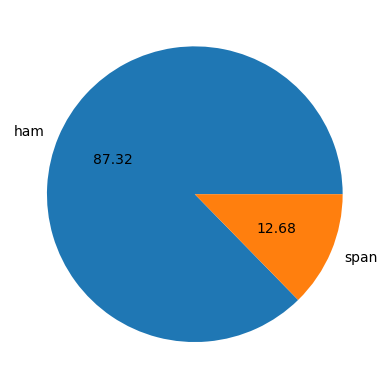

In [55]:
plt.pie(df['label'].value_counts(),labels=['ham','span'],autopct='%0.2f')

In [57]:
df['num_characters']=df['text'].apply(len)

In [59]:
df.head()

,label,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [61]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [62]:
df.head()

,label,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [65]:
df['num_sen']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [67]:
df.head()

,label,text,num_characters,num_words,num_sen
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [69]:
df.describe()

,label,num_characters,num_words,num_sen
count,5172.000000,5172.000000,5172.000000,5172.000000
mean,0.126837,78.967131,18.452243,1.965584
std,0.332822,58.221209,13.321800,1.448121
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [71]:
#ham
df[df['label']==0].describe()

,label,num_characters,num_words,num_sen
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123782,1.820195
std,0.0,56.358207,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [73]:
#spam
df[df['label']==1].describe()

,label,num_characters,num_words,num_sen
count,656.0,656.000000,656.000000,656.000000
mean,1.0,137.536585,27.597561,2.966463
std,0.0,30.522501,7.069962,1.486459
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,148.500000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

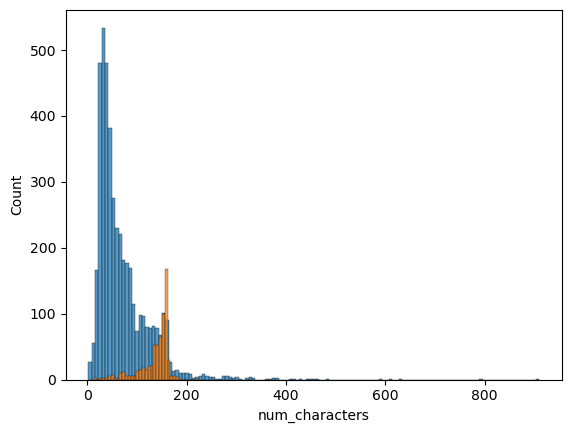

In [75]:
sns.histplot(df[df['label']==0]['num_characters'])
sns.histplot(df[df['label']==1]['num_characters'])

<Axes: xlabel='num_words', ylabel='Count'>

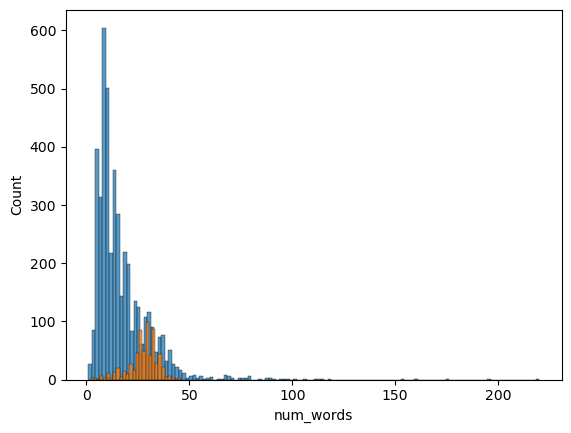

In [76]:
sns.histplot(df[df['label']==0]['num_words'])
sns.histplot(df[df['label']==1]['num_words'])

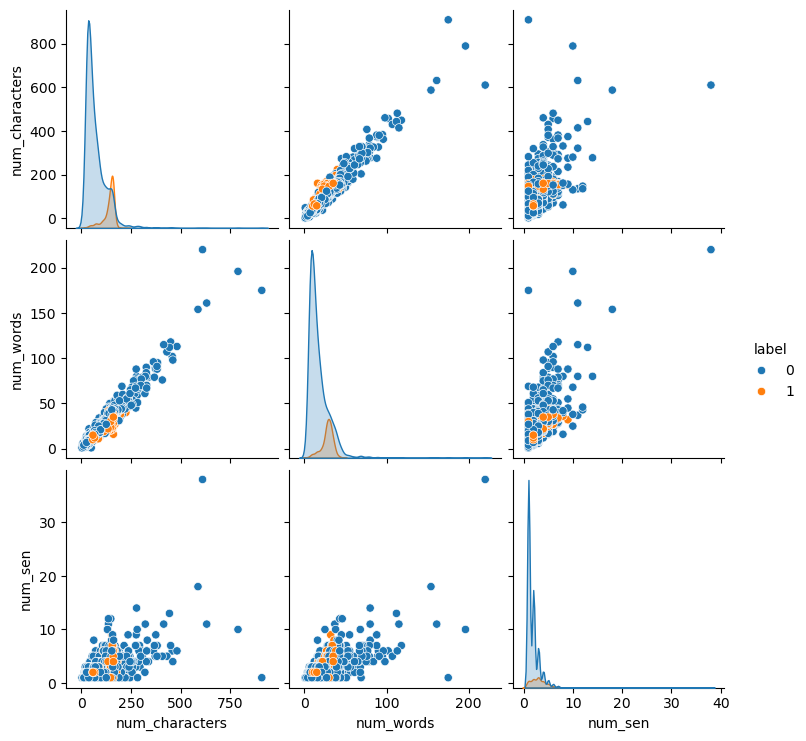

In [78]:
sns.pairplot(df,hue='label')

<Axes: >

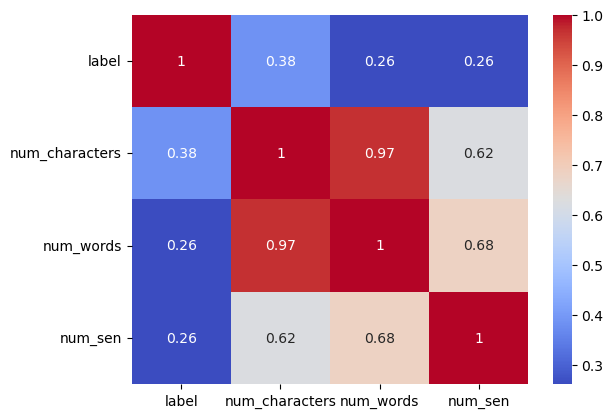

In [79]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

In [81]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)

    text=y[:]
    y.clear()
    for i in text :
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text=y[:]
    y.clear()
    ps= PorterStemmer()
    for i in text:
        y.append(ps.stem(i))
    
    
    return " ".join(y)

In [82]:
df['transform_text']=df['text'].apply(transform_text)

In [84]:
from wordcloud import WordCloud
wc = WordCloud(width=800, height=400, background_color='white')

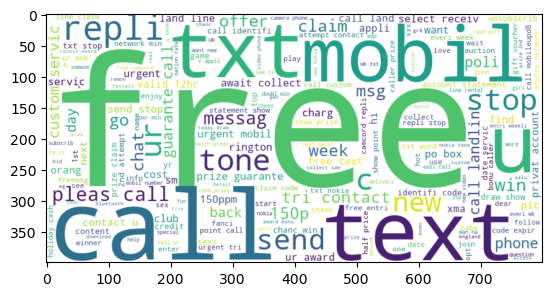

In [85]:
spam_wc= wc.generate(df[df['label']==1]['transform_text'].str.cat(sep=" "))
plt.imshow(spam_wc, interpolation='bilinear')

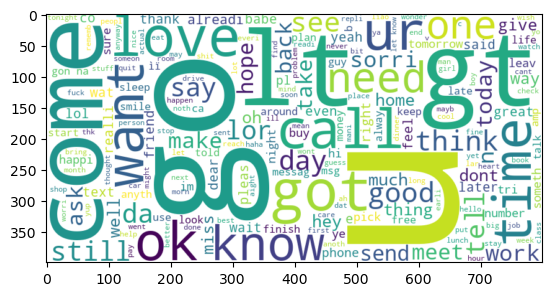

In [86]:
spam_wc= wc.generate(df[df['label']==0]['transform_text'].str.cat(sep=" "))
plt.imshow(spam_wc, interpolation='bilinear')

In [87]:
spam_corpus=[]
for msg in df[df['label']==1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

len(spam_corpus)

9954

In [88]:
# sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30)),columns=['0', '1'])

C:\Users\91991\AppData\Local\Temp\ipykernel_6736\1907773723.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='word', y='count', data=spam_corpus_counts, palette='viridis')


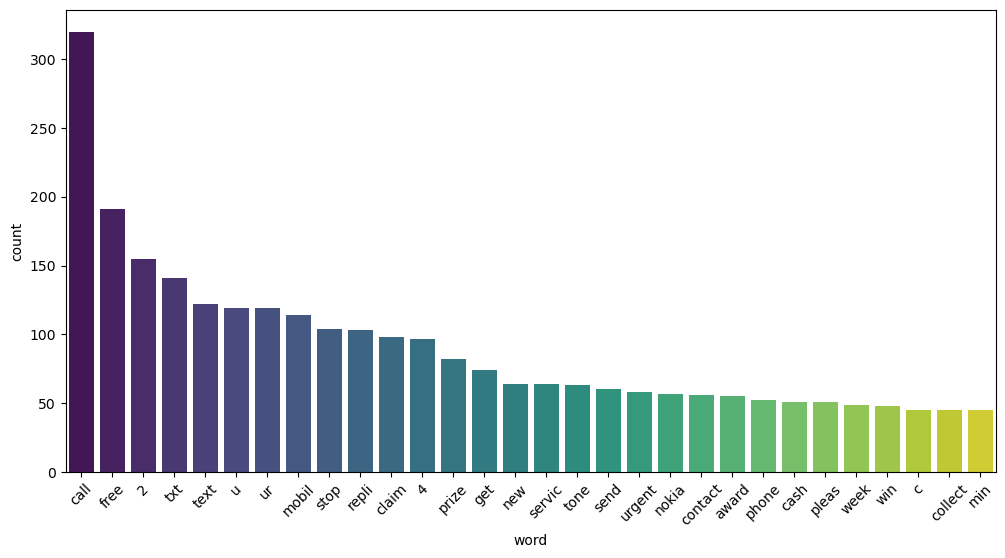

In [92]:
spam_corpus_counts = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])
plt.figure(figsize=(12, 6))
sns.barplot(x='word', y='count', data=spam_corpus_counts, palette='viridis')
plt.xticks(rotation=45)
plt.show()

In [93]:
ham_corpus=[]
for msg in df[df['label']==0]['transform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

len(ham_corpus)

35404

C:\Users\91991\AppData\Local\Temp\ipykernel_6736\1124387620.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='word', y='count', data=ham_corpus_counts, palette='viridis')


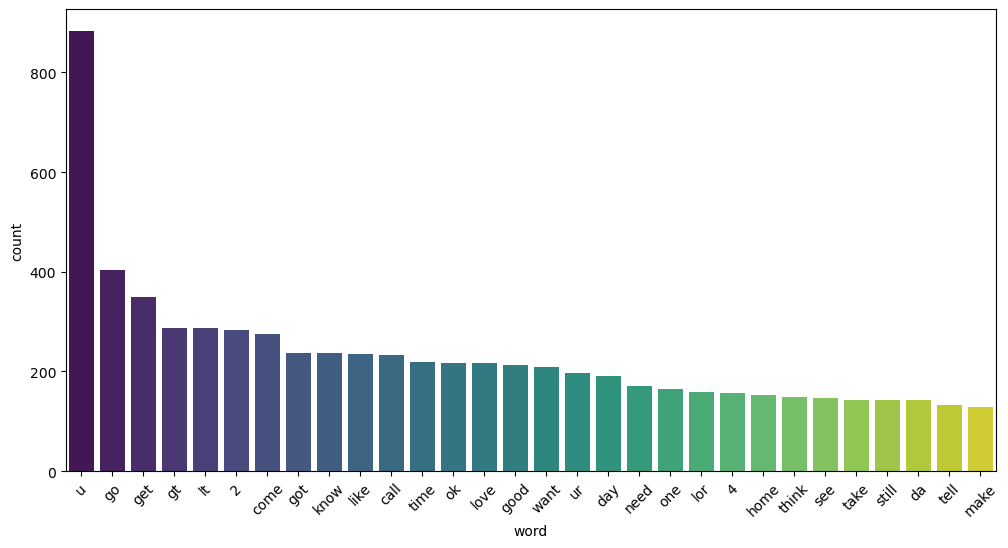

In [94]:
ham_corpus_counts = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])
plt.figure(figsize=(12, 6))
sns.barplot(x='word', y='count', data=ham_corpus_counts, palette='viridis')
plt.xticks(rotation=45)
plt.show()

In [95]:
 ##Modeling

In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

In [97]:
# vectorizer = CountVectorizer()
vectorizer = TfidfVectorizer(max_features=3000)
# x= vectorizer.fit_transform(df['transform_text']).toarray()
x= vectorizer.fit_transform(df['transform_text']).toarray()

In [110]:
x.shape

(5172, 3000)

In [112]:
y= df['label'].values

In [114]:
y

array([0, 0, 1, ..., 1, 1, 1])

In [116]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12)

In [118]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [120]:
gnb.fit(X_train, y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(precision_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))

0.8570048309178744
0.4553191489361702
[[780 128]
 [ 20 107]]


In [122]:
mnb.fit(X_train, y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(precision_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))

0.9806763285024155
0.9908256880733946
[[907   1]
 [ 19 108]]


In [128]:
bnb.fit(X_train, y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(precision_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))

0.9845410628019323
0.9826086956521739
[[906   2]
 [ 14 113]]


In [130]:
def evaluate_model(name, y_true, y_pred):
    return {
        "Model": name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1-score": f1_score(y_true, y_pred),
        "Confusion Matrix":confusion_matrix(y_true, y_pred)
    }

# Store results
results = [
    evaluate_model("GaussianNB", y_test, y_pred1),
    evaluate_model("MultinomialNB", y_test, y_pred2),
    evaluate_model("BernoulliNB", y_test, y_pred3)

]

results_df = pd.DataFrame(results)

# 🔹 Print Results in a Table
print("\n📊 Model Performance Comparison:\n")
print(results_df)


📊 Model Performance Comparison:

           Model  Accuracy  Precision    Recall  F1-score  \
0     GaussianNB  0.857005   0.455319  0.842520  0.591160   
1  MultinomialNB  0.980676   0.990826  0.850394  0.915254   
2    BernoulliNB  0.984541   0.982609  0.889764  0.933884   

          Confusion Matrix  
0  [[780, 128], [20, 107]]  
1    [[907, 1], [19, 108]]  
2    [[906, 2], [14, 113]]  


In [132]:
import pickle
pickle.dump(vectorizer,open('vectorizer.pkl','wb'))
pickle.dump(bnb,open('model.pkl','wb'))